<a href="https://colab.research.google.com/github/HuynhDuyNhan/AI/blob/main/Face%20Detection%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [4]:
%cd "gdrive/MyDrive/AI"

/content/gdrive/MyDrive/AI


In [5]:
%ls

Test/  Train/


In [29]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation ='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [31]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/AI/Train',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 126 images belonging to 3 classes.


In [32]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/AI/Test',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 55 images belonging to 3 classes.


In [33]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.fit(training_set,epochs = 20,validation_data=test_set,verbose = 1)

Epoch 1/20
4/4 [==============================] - 14s 4s/step - loss: 2.6143 - accuracy: 0.2937 - val_loss: 1.0498 - val_accuracy: 0.2909
Epoch 2/20
4/4 [==============================] - 11s 3s/step - loss: 0.9947 - accuracy: 0.5079 - val_loss: 0.9721 - val_accuracy: 0.4364
Epoch 3/20
4/4 [==============================] - 11s 3s/step - loss: 0.9264 - accuracy: 0.4683 - val_loss: 0.8637 - val_accuracy: 0.4364
Epoch 4/20
4/4 [==============================] - 11s 3s/step - loss: 0.7514 - accuracy: 0.6429 - val_loss: 0.5931 - val_accuracy: 0.8909
Epoch 5/20
4/4 [==============================] - 11s 3s/step - loss: 0.4964 - accuracy: 0.8413 - val_loss: 0.4191 - val_accuracy: 0.8727
Epoch 6/20
4/4 [==============================] - 11s 3s/step - loss: 0.3229 - accuracy: 0.8968 - val_loss: 0.4604 - val_accuracy: 0.8364
Epoch 7/20
4/4 [==============================] - 11s 3s/step - loss: 0.2577 - accuracy: 0.9206 - val_loss: 0.2510 - val_accuracy: 0.9273
Epoch 8/20
4/4 [==================

In [35]:
from keras.models import load_model
model.save('Final.h5')
model_CNN = load_model('Final.h5')

array([2])

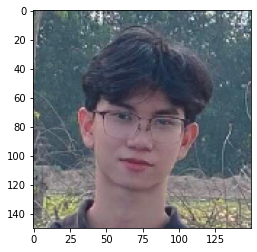

In [38]:
from tensorflow.keras.utils import load_img, img_to_array
from numpy import argmax
import matplotlib.pyplot as plt 
import numpy as np 
img = load_img('nhan.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([1])

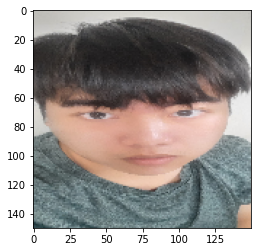

In [39]:
img = load_img('nam.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([0])

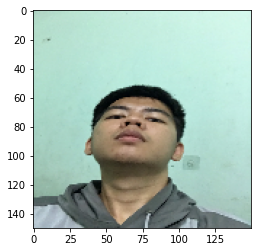

In [40]:
img = load_img('danh.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)